In [1]:
'''
CS256 Assignment 9
Date 11.03.2018
Graph the times of day that Apache events occurred during the first two weeks of the present semester. Due 11/4.
'''

import numpy as np
import matplotlib.pyplot as plt


In [5]:
log2weeks = dict()
with open("ApacheAug18-31.txt", 'rt') as datafile:
    for line in datafile:
        if line:
            line1 = line.strip().split(':')
            if line1[1]:               
# 203.98.184.3 - - [18/Aug/2018:00:06:45 -0700] "GET /favicon.ico HTTP/1.1" 302 218 "-" "Safari/13605.3.8 CFNetwork/902.1 Darwin/17.7.0 (x86_64)"
                if line1[1] in log2weeks:
                    log2weeks[line1[1]] += 1
                else:
                    log2weeks[line1[1]] = 1
            else: 
# ::1 - - [31/Aug/2018:23:25:46 -0700] "GET /~dputnam/the_one_string.cgi HTTP/1.1" 200 692 "-" "Ruby"                
                if line1[3] in log2weeks:
                    log2weeks[line1[3]] += 1
                else:
                    log2weeks[line1[3]] = 1
log2weeks

# separating data for each day
def parseline(date):
    log2day = dict()
    with open("ApacheAug18-31.txt", 'rt') as datafile:
        for line in datafile:
            if str(date) + '/Aug/2018' in line:
                line1 = line.strip().split(':')
                if line1[1]:               
# 203.98.184.3 - - [18/Aug/2018:00:06:45 -0700] "GET /favicon.ico HTTP/1.1" 302 218 "-" "Safari/13605.3.8 CFNetwork/902.1 Darwin/17.7.0 (x86_64)"
                    if line1[1] in log2day:
                        log2day[line1[1]] += 1
                    else:
                        log2day[line1[1]] = 1
                else: 
# ::1 - - [31/Aug/2018:23:25:46 -0700] "GET /~dputnam/the_one_string.cgi HTTP/1.1" 200 692 "-" "Ruby"                
                    if line1[3] in log2day:
                        log2day[line1[3]] += 1
                    else:
                        log2day[line1[3]] = 1        
    return log2day

datelist = []

for date in range(18, 32):
    datelist.append(parseline(date))
                  
print(datelist[2])

# Calculating mean and SEM for hourly data
timeMean = []
timeSEM = []
for key in datelist[0].keys():
    total = 0
    totalerr = 0
    for i in range(len(datelist)):     
        total += datelist[i][key]
    meanVal = total / len(datelist)
    timeMean.append(meanVal)
    for i in range(len(datelist)):     
        totalerr += (datelist[i][key] - meanVal) ** 2
    errVal = ((totalerr / (len(datelist) - 1)) ** 0.5) / (len(datelist) ** 0.5)
    timeSEM.append(errVal)
    
print(timeMean)     
print(timeSEM)          


{'00': 58, '01': 21, '02': 14, '03': 28, '04': 13, '05': 29, '06': 67, '07': 32, '08': 49, '09': 118, '10': 133, '11': 170, '12': 68, '13': 105, '14': 71, '15': 77, '16': 85, '17': 85, '18': 63, '19': 121, '20': 43, '21': 61, '22': 71, '23': 57}
[64.07142857142857, 54.857142857142854, 32.714285714285715, 28.0, 27.857142857142858, 35.357142857142854, 58.785714285714285, 52.214285714285715, 50.57142857142857, 69.0, 87.64285714285714, 78.14285714285714, 65.92857142857143, 72.35714285714286, 64.21428571428571, 60.92857142857143, 105.5, 111.0, 76.57142857142857, 71.57142857142857, 66.71428571428571, 105.14285714285714, 79.78571428571429, 58.42857142857143]
[13.670560446446123, 14.850114567529767, 3.168229254505611, 3.452980874994376, 4.18508227610531, 3.5789481278340496, 14.586678617581924, 6.4842824095922085, 5.024898758713635, 8.224193737830028, 25.34457202716567, 11.270820607846366, 11.45774093421306, 8.40565426054871, 6.916438907310303, 9.79036546238036, 15.885147531197566, 36.993019834

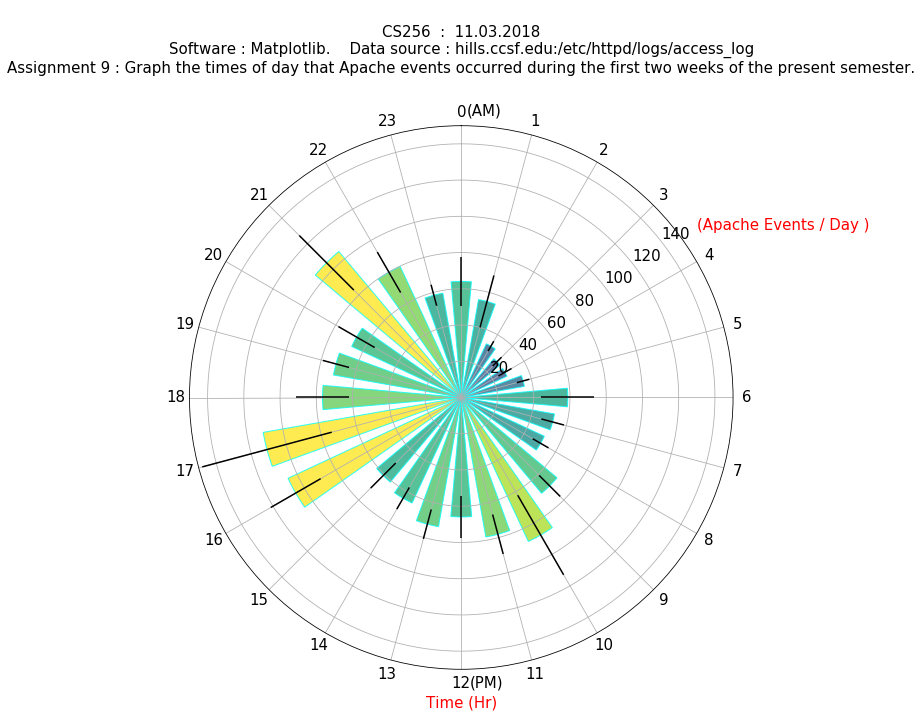

In [5]:
r = np.arange(20, 160, 20)
# Compute pie slices
N = 24
theta = np.linspace(0, np.pi * 2, 24, endpoint=False)

plt.rcParams["figure.figsize"] = (20, 10)

ax = plt.subplot(111, projection='polar')

bars = ax.bar(theta, timeMean, width = 0.175, bottom = 0.0, edgecolor = 'cyan', yerr = timeSEM)
ax.set_rmax(150)

# Set the circumference labels
ax.set_xticks(np.linspace(0, np.pi * 2, 24, endpoint=False))
ax.set_xticklabels(np.arange(0, 24, 1), fontsize = 15)      
ax.set_yticklabels(r, fontsize = 15) 

# Make the labels go clockwise
ax.set_theta_direction(-1)       

# Place 0 at the top
ax.set_theta_offset(np.pi / 2.0)  

# Use custom colors and opacity
for r1, bar in zip(timeMean, bars):
    bar.set_facecolor(plt.cm.viridis(r1 / 100))
    bar.set_alpha(0.8)
    
plt.text(np.pi / 3.3, 160, '(Apache Events / Day )', fontsize = 15, color = 'red')    
plt.text(0 + 0.02, 156, '(AM)', fontsize = 15)  
plt.text(np.pi - 0.028 , 160, '(PM)', fontsize = 15)  
ax.set_rlabel_position(52)  # get radial labels away from plotted line
ax.grid(True)

ax.set_title("""
CS256  :  11.03.2018
Software : Matplotlib.    Data source : hills.ccsf.edu:/etc/httpd/logs/access_log
Assignment 9 : Graph the times of day that Apache events occurred during the first two weeks of the present semester.
""", va='bottom', fontsize = 15)
plt.xlabel('Time (Hr)', fontsize = 15, color = 'red')
plt.show()

